# OPENFLIGHTS ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Loading datasets direcly from online

Here I have loaded all of the datasets directly online via the pandas library, I also have renamed the columns.

To ensure that the first row does not get interpreted as headers for when the sets are read in (since the filea are in .dat format), following additional argument was specificied below along with the delimiter:

    header = None
    sep = ","
    
** Additional step:** The data also uses '/N' to denote NaN values, so additional argumnent was also used:
    
    na_values=['\\N']

## Airports

In [2]:
airports = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat", sep=",", header=None, na_values=['\\N'])
airports.rename(columns={0:"Airport ID", 1:"Airport", 2:"City", 3:"Country", 4:"IATA/FAA", 5:"ICAO", 6:"Latitude", 7:"Longtitude", 8:"Altitude", 9:"Timezone", 10:"DST", 11:"Tz database time zone"}, inplace=True)

airports.head()

,Airport ID,Airport,City,Country,IATA/FAA,ICAO,Latitude,Longtitude,Altitude,Timezone,DST,Tz database time zone
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby


In [3]:
airports["Country"].nunique()
# number of countries where airports are based in 

240

In [4]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8107 entries, 0 to 8106
Data columns (total 12 columns):
Airport ID               8107 non-null int64
Airport                  8107 non-null object
City                     8107 non-null object
Country                  8107 non-null object
IATA/FAA                 5880 non-null object
ICAO                     6785 non-null object
Latitude                 8107 non-null float64
Longtitude               8107 non-null float64
Altitude                 8107 non-null int64
Timezone                 8107 non-null float64
DST                      8107 non-null object
Tz database time zone    8015 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 760.1+ KB


## Airlines

In [5]:
airlines = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airlines.dat", sep=",", header=None, na_values=['\\N'])
airlines.rename(columns={0:"Airline ID", 1:"Airline Name", 2:"Alias", 3:"IATA", 4:"ICAO", 5:"Callsign", 6:"Airline Base Country", 7:"Active"}, inplace=True)

airlines.head()

,Airline ID,Airline Name,Alias,IATA,ICAO,Callsign,Airline Base Country,Active
0,1,Private flight,NaN,-,NaN,NaN,NaN,Y
1,2,135 Airways,NaN,NaN,GNL,GENERAL,United States,N
2,3,1Time Airline,NaN,1T,RNX,NEXTIME,South Africa,Y
3,4,2 Sqn No 1 Elementary Flying Training School,NaN,NaN,WYT,NaN,United Kingdom,N
4,5,213 Flight Unit,NaN,NaN,TFU,NaN,Russia,N


In [6]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6048 entries, 0 to 6047
Data columns (total 8 columns):
Airline ID              6048 non-null int64
Airline Name            6048 non-null object
Alias                   138 non-null object
IATA                    1460 non-null object
ICAO                    5796 non-null object
Callsign                5302 non-null object
Airline Base Country    6030 non-null object
Active                  6048 non-null object
dtypes: int64(1), object(7)
memory usage: 378.1+ KB


## Routes

In [7]:
routes = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat", sep=",", header=None, na_values=['\\N'])
routes.rename(columns={0:"Airline Code", 1:"Airline ID", 2:"Source Airport", 3:"Source Airport ID", 4:"Destination Airport", 5:"Destination Airport ID", 6:"Codeshare", 7:"Stops", 8:"Equipment"}, inplace=True)
routes.head()

,Airline Code,Airline ID,Source Airport,Source Airport ID,Destination Airport,Destination Airport ID,Codeshare,Stops,Equipment
0,2B,410.0,AER,2965.0,KZN,2990.0,NaN,0,CR2
1,2B,410.0,ASF,2966.0,KZN,2990.0,NaN,0,CR2
2,2B,410.0,ASF,2966.0,MRV,2962.0,NaN,0,CR2
3,2B,410.0,CEK,2968.0,KZN,2990.0,NaN,0,CR2
4,2B,410.0,CEK,2968.0,OVB,4078.0,NaN,0,CR2


In [8]:
routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 9 columns):
Airline Code              67663 non-null object
Airline ID                66985 non-null float64
Source Airport            67663 non-null object
Source Airport ID         67424 non-null float64
Destination Airport       67663 non-null object
Destination Airport ID    67421 non-null float64
Codeshare                 14597 non-null object
Stops                     67663 non-null int64
Equipment                 67645 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 4.6+ MB


#  Merging tables together

Here I have chosen to merge the routes table with the airports twice via an inner join in order to obtain the Source Airport and Destination Airport coordinate pairs as well as linking the respective airline information for each route

This may not be an elegant solution due to the table having too many columns, although I can further "cleanse" the data by either copying specific columns into a new dataframe or I can index only the columns that I need when finding the longest/shortest scheduled flights

In [9]:
pairs = routes.merge(airports, right_on = "Airport ID", left_on = 'Source Airport ID')\
        .merge(airports, right_on="Airport ID", left_on="Destination Airport ID", suffixes=("_start", "_end"))\
        .merge(airlines, on="Airline ID")

pairs

,Airline Code,Airline ID,Source Airport,Source Airport ID,Destination Airport,Destination Airport ID,Codeshare,Stops,Equipment,Airport ID_start,...,Timezone_end,DST_end,Tz database time zone_end,Airline Name,Alias,IATA,ICAO,Callsign,Airline Base Country,Active
0,2B,410.0,AER,2965.0,KZN,2990.0,NaN,0,CR2,2965,...,4.0,N,Europe/Moscow,Aerocondor,NaN,2B,ARD,AEROCONDOR,Portugal,Y
1,2B,410.0,ASF,2966.0,KZN,2990.0,NaN,0,CR2,2966,...,4.0,N,Europe/Moscow,Aerocondor,NaN,2B,ARD,AEROCONDOR,Portugal,Y
2,2B,410.0,CEK,2968.0,KZN,2990.0,NaN,0,CR2,2968,...,4.0,N,Europe/Moscow,Aerocondor,NaN,2B,ARD,AEROCONDOR,Portugal,Y
3,2B,410.0,DME,4029.0,KZN,2990.0,NaN,0,CR2,4029,...,4.0,N,Europe/Moscow,Aerocondor,NaN,2B,ARD,AEROCONDOR,Portugal,Y
4,2B,410.0,EGO,6156.0,KZN,2990.0,NaN,0,CR2,6156,...,4.0,N,Europe/Moscow,Aerocondor,NaN,2B,ARD,AEROCONDOR,Portugal,Y
5,2B,410.0,LED,2948.0,KZN,2990.0,NaN,0,CR2,2948,...,4.0,N,Europe/Moscow,Aerocondor,NaN,2B,ARD,AEROCONDOR,Portugal,Y
6,2B,410.0,SVX,2975.0,KZN,2990.0,NaN,0,CR2,2975,...,4.0,N,Europe/Moscow,Aerocondor,NaN,2B,ARD,AEROCONDOR,Portugal,Y
7,2B,410.0,KZN,2990.0,DME,4029.0,NaN,0,CR2,2990,...,4.0,N,Europe/Moscow,Aerocondor,NaN,2B,ARD,AEROCONDOR,Portugal,Y
8,2B,410.0,NBC,6969.0,DME,4029.0,NaN,0,CR2,6969,...,4.0,N,Europe/Moscow,Aerocondor,NaN,2B,ARD,AEROCONDOR,Portugal,Y
9,2B,410.0,UUA,6160.0,DME,4029.0,NaN,0,CR2,6160,...,4.0,N,Europe/Moscow,Aerocondor,NaN,2B,ARD,AEROCONDOR,Portugal,Y


In [10]:
pairs.info()
# quite a lot of columns, but the objective of the analysis is clear

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66548 entries, 0 to 66547
Data columns (total 40 columns):
Airline Code                   66548 non-null object
Airline ID                     66548 non-null float64
Source Airport                 66548 non-null object
Source Airport ID              66548 non-null float64
Destination Airport            66548 non-null object
Destination Airport ID         66548 non-null float64
Codeshare                      14555 non-null object
Stops                          66548 non-null int64
Equipment                      66532 non-null object
Airport ID_start               66548 non-null int64
Airport_start                  66548 non-null object
City_start                     66548 non-null object
Country_start                  66548 non-null object
IATA/FAA_start                 66548 non-null object
ICAO_start                     66072 non-null object
Latitude_start                 66548 non-null float64
Longtitude_start               66548 non-

# Defining distance calculation function

Now that we have a table containing routes data now incorporating the coordinate pairs of the source and destination airports for each of the journeys, now we can calcuate the distance.

I have chosen to use the vincenty function from the geopy package to calculate the distance, there is also another function (great_circle) that does the same thing only difference is that vincenty assumes Earth to be ellipsoidal while great circle assumes a spherical Earth.

However, as I have chosen to calcualte distances to a precision of 2 decimal places both functions will return the same result anyway.

In [11]:
# importing geopy functions
from geopy.distance import vincenty

**note:** geopy's vincenty function will return strings (e.g. "1507 km") unless, it is specificed that a float output is desired (via a method), e.g.

    vincenty(...).kilometers

In [12]:
# defining function to apply to merged table
def ellip_dist(row):
    start =  (row["Latitude_start"], row["Longtitude_start"])
    end = (row["Latitude_end"], row["Longtitude_end"])
    return round((vincenty(start,end)).kilometers,2)

# Rounded outputs to a precision of 2 decimal places

## Calculation checks

In [13]:
pairs["Distance(km)"] = pairs.apply(ellip_dist, axis=1)

pairs.head()[["Source Airport", "Destination Airport", "Distance(km)"]]

,Source Airport,Destination Airport,Distance(km)
0,AER,KZN,1507.99
1,ASF,KZN,1040.94
2,CEK,KZN,773.13
3,DME,KZN,718.10
4,EGO,KZN,1010.82


In [14]:
pairs.tail()[["Source Airport", "Destination Airport", "Distance(km)"]]

,Source Airport,Destination Airport,Distance(km)
66543,LIF,TGJ,68.62
66544,GEA,TOU,205.50
66545,GEA,UVE,179.42
66546,LIF,UVE,71.06
66547,KOC,BMY,110.55


** Reference calcuations:** From AER to KZN ~ 1507km and LIF to TGJ ~ 69km

Both distance calculations are close to stated values --> calculation function works fully!

# Calculation of the maximum and minimum flight distances

In [15]:
pairs["Distance(km)"].min()

# Clearly there is something wrong, there shouldn't be a 0 value
# Maybe I have to specify a condition to filterout missing values?

0.0

In [16]:
pairs["Distance(km)"].max()

13804.389999999999

In [17]:
# Checking if any columns have missing values, have tried with other columns too
pairs[pairs["Latitude_start"].isnull()]

,Airline Code,Airline ID,Source Airport,Source Airport ID,Destination Airport,Destination Airport ID,Codeshare,Stops,Equipment,Airport ID_start,...,DST_end,Tz database time zone_end,Airline Name,Alias,IATA,ICAO,Callsign,Airline Base Country,Active,Distance(km)


filtering out any distances that are equal to 0

In [18]:
true_min = pairs[pairs["Distance(km)"] != 0]["Distance(km)"].min()

true_min

1.2

### IMPORTANT STEP before further analysis

**re-assigning the table this time without values that have a 0km distance**

In [19]:
pairs = pairs[pairs["Distance(km)"] != 0]

**A possible explaination to as why there was a 0 km flight distance:** A flight maybe have embarked but an emergency might have caused the plane to land very shortly after take off.

In [20]:
# Choosing specific columns to show.
distCriteria = ["Source Airport", "Airport_start", "City_start", "Destination Airport", "Airport_end", "City_end", "Stops", "Airline Name", "Distance(km)"]

**Longest flight:** between SYD and DFW with a distance of 13804.39 km hosted by Quantas(SYD>DFW) and American Airlines (DFW>SYD)

In [21]:
pairs[pairs["Distance(km)"] == pairs["Distance(km)"].max()][distCriteria]

,Source Airport,Airport_start,City_start,Destination Airport,Airport_end,City_end,Stops,Airline Name,Distance(km)
27043,SYD,Sydney Intl,Sydney,DFW,Dallas Fort Worth Intl,Dallas-Fort Worth,0,Qantas,13804.39
29586,SYD,Sydney Intl,Sydney,DFW,Dallas Fort Worth Intl,Dallas-Fort Worth,0,American Airlines,13804.39


**Shortest flight:** between TZA and BZE with a distance of 1.2km being hosted by Midwest Airlines (Egypt) in both directions.

In [22]:
pairs[pairs["Distance(km)"] == pairs["Distance(km)"].min()][distCriteria]

,Source Airport,Airport_start,City_start,Destination Airport,Airport_end,City_end,Stops,Airline Name,Distance(km)
66200,TZA,Belize City Municipal Airport,Belize,BZE,Philip S W Goldson Intl,Belize City,0,Midwest Airlines (Egypt),1.2
66211,BZE,Philip S W Goldson Intl,Belize City,TZA,Belize City Municipal Airport,Belize,0,Midwest Airlines (Egypt),1.2


But these are the longest and shortest flights overall, one could take a look at flights with stopovers only.

### Longest and shortest flights with stopovers

There are only flights that have a stopover or none in the openflights data.

In [23]:
pairs["Stops"].value_counts()

0    66536
1       11
Name: Stops, dtype: int64

**Longest flight with a stopover:** Fiumicino, Rome to Jose Marti Intl, Havana hosted by Cubana de Aviación (8710.15 km)

**Shortest flight with a stopover:** Vancouver Intl, Vancouver to Campbell River, Campbell River by Air Canada (172.79 km)

In [24]:
stopover = pairs[(pairs["Stops"] != 0)][distCriteria]
stopover.sort_values("Distance(km)", ascending=False)

,Source Airport,Airport_start,City_start,Destination Airport,Airport_end,City_end,Stops,Airline Name,Distance(km)
37129,FCO,Fiumicino,Rome,HAV,Jose Marti Intl,Havana,1,Cubana de Aviación,8710.15
27442,ABJ,Abidjan Felix Houphouet Boigny Intl,Abidjan,BRU,Brussels Natl,Brussels,1,Air Canada,5119.64
57913,BOS,General Edward Lawrence Logan Intl,Boston,MCO,Orlando Intl,Orlando,1,Southwest Airlines,1804.12
57962,MCO,Orlando Intl,Orlando,BOS,General Edward Lawrence Logan Intl,Boston,1,Southwest Airlines,1804.12
58724,MCO,Orlando Intl,Orlando,CAK,Akron Canton Regional Airport,Akron,1,Southwest Airlines,1385.28
57759,MCO,Orlando Intl,Orlando,HOU,William P Hobby,Houston,1,AirTran Airways,1366.54
57672,MCO,Orlando Intl,Orlando,ORF,Norfolk Intl,Norfolk,1,AirTran Airways,1053.53
23756,ARN,Arlanda,Stockholm,GEV,Gallivare,Gallivare,1,Scandinavian Airlines System,846.07
57600,HOU,William P Hobby,Houston,SAT,San Antonio Intl,San Antonio,1,AirTran Airways,309.37
65755,YRT,Rankin Inlet,Rankin Inlet,YEK,Arviat,Eskimo Point,1,Canadian North,217.12


# Further aggregations 
I have carried out further aggregation grouping the maximum distances travelled (in km) according to: Airline, Source Airport, Destination Airport and Equipment (plane type)

I have used inner joins on the columns from the initial aggregations to get detailed flight information

## By Airline

### Maximum distance travelled by each airline (descending order)

In [25]:
byAirline_max = pairs.groupby(["Airline ID", "Airline Name"])["Distance(km)"].max().reset_index().sort_values("Distance(km)", ascending=False)

byAirline_max.head()

,Airline ID,Airline Name,Distance(km)
2,24.0,American Airlines,13804.39
333,4089.0,Qantas,13804.39
172,2009.0,Delta Air Lines,13581.80
254,3029.0,JetBlue Airways,13419.85
181,2183.0,Emirates,13419.85


In [26]:
byAirline_max_merge = byAirline_max.merge(pairs, on= ["Airline ID", "Airline Name", "Distance(km)"])
byAirline_max_merge = byAirline_max_merge[distCriteria].sort_values("Distance(km)", ascending=False)

byAirline_max_merge.head()

,Source Airport,Airport_start,City_start,Destination Airport,Airport_end,City_end,Stops,Airline Name,Distance(km)
0,SYD,Sydney Intl,Sydney,DFW,Dallas Fort Worth Intl,Dallas-Fort Worth,0,American Airlines,13804.39
1,SYD,Sydney Intl,Sydney,DFW,Dallas Fort Worth Intl,Dallas-Fort Worth,0,Qantas,13804.39
2,JNB,Johannesburg Intl,Johannesburg,ATL,Hartsfield Jackson Atlanta Intl,Atlanta,0,Delta Air Lines,13581.80
3,ATL,Hartsfield Jackson Atlanta Intl,Atlanta,JNB,Johannesburg Intl,Johannesburg,0,Delta Air Lines,13581.80
4,LAX,Los Angeles Intl,Los Angeles,DXB,Dubai Intl,Dubai,0,JetBlue Airways,13419.85


### Minimum distance travelled by each airline (ascending order)

In [27]:
byAirline_min = pairs.groupby(["Airline ID", "Airline Name"])["Distance(km)"].min().reset_index().sort_values("Distance(km)")

byAirline_min.head()

,Airline ID,Airline Name,Distance(km)
289,3498.0,Midwest Airlines (Egypt),1.20
273,3287.0,Linhas A,2.83
510,16726.0,Era Alaska,5.88
105,1173.0,Airbus France,5.88
22,146.0,Air Salone,8.08


In [28]:
byAirline_min_merge = byAirline_min.merge(pairs, on= ["Airline ID", "Airline Name", "Distance(km)"])
byAirline_min_merge = byAirline_min_merge[distCriteria].sort_values("Distance(km)")

byAirline_min_merge.head()

,Source Airport,Airport_start,City_start,Destination Airport,Airport_end,City_end,Stops,Airline Name,Distance(km)
0,TZA,Belize City Municipal Airport,Belize,BZE,Philip S W Goldson Intl,Belize City,0,Midwest Airlines (Egypt),1.20
1,BZE,Philip S W Goldson Intl,Belize City,TZA,Belize City Municipal Airport,Belize,0,Midwest Airlines (Egypt),1.20
2,WRY,Westray Airport,Westray,PPW,Papa Westray Airport,Papa Westray,0,Linhas A,2.83
3,PPW,Papa Westray Airport,Papa Westray,WRY,Westray Airport,Westray,0,Linhas A,2.83
4,KUK,Kasigluk Airport,Kasigluk,NUP,Nunapitchuk Airport,Nunapitchuk,0,Era Alaska,5.88


## By Source Airport

### Maximum distance travelled from each airport (descending order)

In [29]:
bySourceAirport_max = pairs.groupby(["Source Airport", "Airport_start"])["Distance(km)"].max().reset_index().sort_values("Distance(km)", ascending=False)

bySourceAirport_max.head()

,Source Airport,Airport_start,Distance(km)
2566,SYD,Sydney Intl,13804.39
160,ATL,Hartsfield Jackson Atlanta Intl,13581.80
1263,JNB,Johannesburg Intl,13581.80
712,DXB,Dubai Intl,13419.85
1485,LAX,Los Angeles Intl,13419.85


In [30]:
bySourceAirport_maxMerge = bySourceAirport_max.merge(pairs, on=["Source Airport", "Airport_start", "Distance(km)"])
bySourceAirport_maxMerge = bySourceAirport_maxMerge[distCriteria].sort_values("Distance(km)", ascending=False)

bySourceAirport_maxMerge.head()

,Source Airport,Airport_start,City_start,Destination Airport,Airport_end,City_end,Stops,Airline Name,Distance(km)
0,SYD,Sydney Intl,Sydney,DFW,Dallas Fort Worth Intl,Dallas-Fort Worth,0,Qantas,13804.39
1,SYD,Sydney Intl,Sydney,DFW,Dallas Fort Worth Intl,Dallas-Fort Worth,0,American Airlines,13804.39
2,ATL,Hartsfield Jackson Atlanta Intl,Atlanta,JNB,Johannesburg Intl,Johannesburg,0,Delta Air Lines,13581.80
3,JNB,Johannesburg Intl,Johannesburg,ATL,Hartsfield Jackson Atlanta Intl,Atlanta,0,Delta Air Lines,13581.80
4,DXB,Dubai Intl,Dubai,LAX,Los Angeles Intl,Los Angeles,0,Emirates,13419.85


### Minimum distance travelled from each airport (ascending order)

In [31]:
bySourceAirport_min = pairs.groupby(["Source Airport", "Airport_start"])["Distance(km)"].min().reset_index().sort_values("Distance(km)")

bySourceAirport_min.head()

,Source Airport,Airport_start,Distance(km)
409,BZE,Philip S W Goldson Intl,1.20
2761,TZA,Belize City Municipal Airport,1.20
2941,WRY,Westray Airport,2.83
2167,PPW,Papa Westray Airport,2.83
1442,KUK,Kasigluk Airport,5.88


In [32]:
bySourceAirport_minMerge = bySourceAirport_min.merge(pairs, on=["Source Airport", "Airport_start", "Distance(km)"])
bySourceAirport_minMerge = bySourceAirport_minMerge[distCriteria].sort_values("Distance(km)")

bySourceAirport_minMerge.head()

,Source Airport,Airport_start,City_start,Destination Airport,Airport_end,City_end,Stops,Airline Name,Distance(km)
0,BZE,Philip S W Goldson Intl,Belize City,TZA,Belize City Municipal Airport,Belize,0,Midwest Airlines (Egypt),1.20
1,TZA,Belize City Municipal Airport,Belize,BZE,Philip S W Goldson Intl,Belize City,0,Midwest Airlines (Egypt),1.20
2,WRY,Westray Airport,Westray,PPW,Papa Westray Airport,Papa Westray,0,Linhas A,2.83
3,PPW,Papa Westray Airport,Papa Westray,WRY,Westray Airport,Westray,0,Linhas A,2.83
4,KUK,Kasigluk Airport,Kasigluk,NUP,Nunapitchuk Airport,Nunapitchuk,0,Era Alaska,5.88


## By Destination Airport

### Maximum distance travelled towards each airport (descending order)

In [33]:
byDestAirport_max = pairs.groupby(["Destination Airport", "Airport_end"])["Distance(km)"].max().reset_index().sort_values("Distance(km)", ascending=False)

byDestAirport_max.head()

,Destination Airport,Airport_end,Distance(km)
641,DFW,Dallas Fort Worth Intl,13804.39
160,ATL,Hartsfield Jackson Atlanta Intl,13581.80
1264,JNB,Johannesburg Intl,13581.80
1489,LAX,Los Angeles Intl,13419.85
714,DXB,Dubai Intl,13419.85


In [34]:
byDestAirport_maxMerge = byDestAirport_max.merge(pairs, on=["Destination Airport", "Airport_end", "Distance(km)"])
byDestAirport_maxMerge = byDestAirport_maxMerge[distCriteria].sort_values("Distance(km)", ascending=False)

bySourceAirport_maxMerge.head()

,Source Airport,Airport_start,City_start,Destination Airport,Airport_end,City_end,Stops,Airline Name,Distance(km)
0,SYD,Sydney Intl,Sydney,DFW,Dallas Fort Worth Intl,Dallas-Fort Worth,0,Qantas,13804.39
1,SYD,Sydney Intl,Sydney,DFW,Dallas Fort Worth Intl,Dallas-Fort Worth,0,American Airlines,13804.39
2,ATL,Hartsfield Jackson Atlanta Intl,Atlanta,JNB,Johannesburg Intl,Johannesburg,0,Delta Air Lines,13581.80
3,JNB,Johannesburg Intl,Johannesburg,ATL,Hartsfield Jackson Atlanta Intl,Atlanta,0,Delta Air Lines,13581.80
4,DXB,Dubai Intl,Dubai,LAX,Los Angeles Intl,Los Angeles,0,Emirates,13419.85


### Minimum distance travelled towards each airport (ascending order)

In [35]:
byDestAirport_min = pairs.groupby(["Destination Airport", "Airport_end"])["Distance(km)"].min().reset_index().sort_values("Distance(km)")

byDestAirport_min.head()

,Destination Airport,Airport_end,Distance(km)
409,BZE,Philip S W Goldson Intl,1.20
2763,TZA,Belize City Municipal Airport,1.20
2943,WRY,Westray Airport,2.83
2171,PPW,Papa Westray Airport,2.83
1942,NUP,Nunapitchuk Airport,5.88


In [36]:
byDestAirport_minMerge = byDestAirport_min.merge(pairs, on=["Destination Airport", "Airport_end", "Distance(km)"])
byDestAirport_minMerge = byDestAirport_minMerge[distCriteria].sort_values("Distance(km)")

bySourceAirport_minMerge.head()

,Source Airport,Airport_start,City_start,Destination Airport,Airport_end,City_end,Stops,Airline Name,Distance(km)
0,BZE,Philip S W Goldson Intl,Belize City,TZA,Belize City Municipal Airport,Belize,0,Midwest Airlines (Egypt),1.20
1,TZA,Belize City Municipal Airport,Belize,BZE,Philip S W Goldson Intl,Belize City,0,Midwest Airlines (Egypt),1.20
2,WRY,Westray Airport,Westray,PPW,Papa Westray Airport,Papa Westray,0,Linhas A,2.83
3,PPW,Papa Westray Airport,Papa Westray,WRY,Westray Airport,Westray,0,Linhas A,2.83
4,KUK,Kasigluk Airport,Kasigluk,NUP,Nunapitchuk Airport,Nunapitchuk,0,Era Alaska,5.88


## By Equipment (AIrcraft model)

### Maximum distance travelled by each aircraft model (descending order)

In [37]:
equipCriteria = ["Equipment", "Airport_start","City_start", "Airport_end", "City_end", "Airline Name", "Distance(km)"]

In [38]:
byEquipment_max = pairs.groupby("Equipment")["Distance(km)"].max().reset_index().sort_values("Distance(km)", ascending=False)

byEquipment_max.head()

,Equipment,Distance(km)
2212,744,13804.39
2669,77L,13581.80
1205,388,13419.85
2629,777,13408.73
2680,77W,13144.49


In [39]:
byEquipment_maxMerge = byEquipment_max.merge(pairs, on=["Equipment", "Distance(km)"])
byEquipment_maxMerge = byEquipment_maxMerge[equipCriteria].sort_values("Distance(km)", ascending=False)

byEquipment_maxMerge.head()

,Equipment,Airport_start,City_start,Airport_end,City_end,Airline Name,Distance(km)
0,744,Sydney Intl,Sydney,Dallas Fort Worth Intl,Dallas-Fort Worth,Qantas,13804.39
1,744,Sydney Intl,Sydney,Dallas Fort Worth Intl,Dallas-Fort Worth,American Airlines,13804.39
2,77L,Johannesburg Intl,Johannesburg,Hartsfield Jackson Atlanta Intl,Atlanta,Delta Air Lines,13581.80
3,77L,Hartsfield Jackson Atlanta Intl,Atlanta,Johannesburg Intl,Johannesburg,Delta Air Lines,13581.80
4,388,Los Angeles Intl,Los Angeles,Dubai Intl,Dubai,Emirates,13419.85


### Minimum distance travelled by each aircraft model (ascending order)

In [40]:
byEquipment_min = pairs.groupby("Equipment")["Distance(km)"].min().reset_index().sort_values("Distance(km)")

byEquipment_min.head()

,Equipment,Distance(km)
2896,CNC,1.20
2887,BNI,2.83
2892,CNA,5.88
3275,DHT,8.62
2901,CNC PA2,8.84


In [41]:
byEquipment_minMerge = byEquipment_min.merge(pairs, on=["Equipment", "Distance(km)"])
byEquipment_minMerge = byEquipment_minMerge[equipCriteria].sort_values("Distance(km)")

byEquipment_minMerge.head()

,Equipment,Airport_start,City_start,Airport_end,City_end,Airline Name,Distance(km)
0,CNC,Belize City Municipal Airport,Belize,Philip S W Goldson Intl,Belize City,Midwest Airlines (Egypt),1.20
1,CNC,Philip S W Goldson Intl,Belize City,Belize City Municipal Airport,Belize,Midwest Airlines (Egypt),1.20
2,BNI,Westray Airport,Westray,Papa Westray Airport,Papa Westray,Linhas A,2.83
3,BNI,Papa Westray Airport,Papa Westray,Westray Airport,Westray,Linhas A,2.83
4,CNA,Kasigluk Airport,Kasigluk,Nunapitchuk Airport,Nunapitchuk,Era Alaska,5.88


# Some additional analysis

## Frequency of flights within the dataset

Additionally can look at how often flights are between 2 airports, with both directions being treated as seperate cases

In [42]:
# Grouping all pairs with same source and Destination airport
freq = pairs.groupby(('Source Airport ID', 'Airport_start', 'City_start', 'Destination Airport ID', 'Airport_end', 'City_end')).size()
freq = freq.reset_index()
freq.rename(columns={0:"Frequency"}, inplace=True)
freq.sort_values("Frequency", ascending=False, inplace=True)

freq

,Source Airport ID,Airport_start,City_start,Destination Airport ID,Airport_end,City_end,Frequency
29666,3830.0,Chicago Ohare Intl,Chicago,3682.0,Hartsfield Jackson Atlanta Intl,Atlanta,20
28002,3682.0,Hartsfield Jackson Atlanta Intl,Atlanta,3830.0,Chicago Ohare Intl,Chicago,19
21719,3179.0,Phuket Intl,Phuket,3885.0,Suvarnabhumi Intl,Bangkok,13
29703,3830.0,Chicago Ohare Intl,Chicago,3861.0,Louis Armstrong New Orleans Intl,New Orleans,13
16006,2179.0,Abu Dhabi Intl,Abu Dhabi,2194.0,Seeb Intl,Muscat,12
23259,3370.0,Baiyun Intl,Guangzhou,3386.0,Xiaoshan,Hangzhou,12
26782,3576.0,Miami Intl,Miami,3682.0,Hartsfield Jackson Atlanta Intl,Atlanta,12
29247,3797.0,John F Kennedy Intl,New York,507.0,Heathrow,London,12
27943,3682.0,Hartsfield Jackson Atlanta Intl,Atlanta,3576.0,Miami Intl,Miami,12
4082,507.0,Heathrow,London,3797.0,John F Kennedy Intl,New York,12


Looking at the distribution of flight frequency

In [43]:
freq["Frequency"].value_counts()

1     20557
2      9330
3      3720
4      1558
5       756
6       381
7       204
8       131
9        72
10       41
11       15
12        9
13        2
20        1
19        1
Name: Frequency, dtype: int64

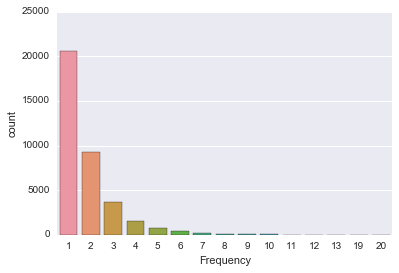

In [44]:
sns.countplot(x="Frequency", data=freq)

The most frequent flight within this dataset is between Chicargo Ohare Intl, Chicargo and Hartsfield Jackson Atlanta Intl, Atlanta with 20 appearances in the dataset

In [45]:
freq[freq["Frequency"] == freq["Frequency"].max()]

,Source Airport ID,Airport_start,City_start,Destination Airport ID,Airport_end,City_end,Frequency
29666,3830.0,Chicago Ohare Intl,Chicago,3682.0,Hartsfield Jackson Atlanta Intl,Atlanta,20


entries that match from the pairs table

In [46]:
maxFreq = freq[freq["Frequency"] == freq["Frequency"].max()]
maxFreq = maxFreq.merge(pairs, on=["Source Airport ID", "Destination Airport ID", "City_start", "Airport_start", "Airport_end", "City_end"])

maxFreq[distCriteria]

,Source Airport,Airport_start,City_start,Destination Airport,Airport_end,City_end,Stops,Airline Name,Distance(km)
0,ORD,Chicago Ohare Intl,Chicago,ATL,Hartsfield Jackson Atlanta Intl,Atlanta,0,Lufthansa,974.96
1,ORD,Chicago Ohare Intl,Chicago,ATL,Hartsfield Jackson Atlanta Intl,Atlanta,0,Alitalia,974.96
2,ORD,Chicago Ohare Intl,Chicago,ATL,Hartsfield Jackson Atlanta Intl,Atlanta,0,Etihad Airways,974.96
3,ORD,Chicago Ohare Intl,Chicago,ATL,Hartsfield Jackson Atlanta Intl,Atlanta,0,Malaysia Airlines,974.96
4,ORD,Chicago Ohare Intl,Chicago,ATL,Hartsfield Jackson Atlanta Intl,Atlanta,0,Asiana Airlines,974.96
5,ORD,Chicago Ohare Intl,Chicago,ATL,Hartsfield Jackson Atlanta Intl,Atlanta,0,Air France,974.96
6,ORD,Chicago Ohare Intl,Chicago,ATL,Hartsfield Jackson Atlanta Intl,Atlanta,0,United Airlines,974.96
7,ORD,Chicago Ohare Intl,Chicago,ATL,Hartsfield Jackson Atlanta Intl,Atlanta,0,Iberia Airlines,974.96
8,ORD,Chicago Ohare Intl,Chicago,ATL,Hartsfield Jackson Atlanta Intl,Atlanta,0,Cathay Pacific,974.96
9,ORD,Chicago Ohare Intl,Chicago,ATL,Hartsfield Jackson Atlanta Intl,Atlanta,0,British Airways,974.96


The 20557 different routes that have only been registered once within the dataset

In [47]:
freq[freq["Frequency"] == freq["Frequency"].min()]

,Source Airport ID,Airport_start,City_start,Destination Airport ID,Airport_end,City_end,Frequency
24833,3406.0,Pudong,Shanghai,2188.0,Dubai Intl,Dubai,1
23585,3374.0,Baoan Intl,Shenzhen,9025.0,Bijie Feixiong Airport,Bijie,1
24004,3384.0,Changbei Intl,Nanchang,4380.0,Changchun,Changchun,1
23566,3374.0,Baoan Intl,Shenzhen,6385.0,Shubuling Airport,Linyi,1
24534,3395.0,Shuangliu,Chengdu,507.0,Heathrow,London,1
26191,3533.0,Fort Lauderdale Hollywood Intl,Fort Lauderdale,2883.0,Cyril E King,St. Thomas,1
23886,3382.0,Wujiaba,Kunming,6399.0,Luzhou Airport,Luzhou,1
25129,3448.0,General Edward Lawrence Logan Intl,Boston,3864.0,Albany Intl,Albany,1
25996,3502.0,Dallas Love Fld,Dallas,3855.0,Tulsa Intl,Tulsa,1
23335,3370.0,Baiyun Intl,Guangzhou,6944.0,Jining Airport,Jining,1
